In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
sys.path.insert(0, 'utils/')
from factorizer import *
import ssd
import palettable
from scipy.interpolate import griddata
from palettable.cartocolors.qualitative import Prism_8
import matplotlib as mpl
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
fig_path = "./figures/BBQ/"

In [3]:
lamb2_range = 10**(np.linspace(np.log10(1e-3),np.log10(1.5),25))
lamb1_range = 10**(np.linspace(np.log10(1e-4),np.log10(1e-2),25))
lamb1_fixed = [1e-4]
lamb2_fixed = [1e-3]
directory = "pickled_factorizers_6_15"
mode = f"BBQ"
print(mode)
fcts = pickle.load(open(f"{directory}/{mode}","rb"))

BBQ


7


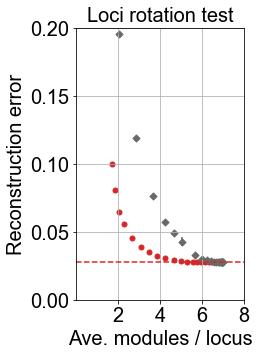

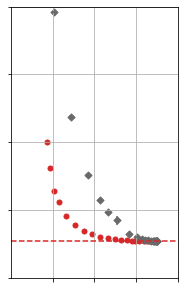

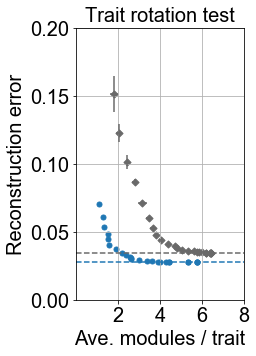

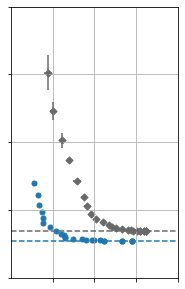

In [4]:
yrange = (0,.2)
xrange = (0,8)
figsize = (3,5)
xt =[2,4,6,8]
name = mode
fct = fcts[(name ,None,None)]
K = fct.computed_params(printout = False)[0][1]
print(K)
fct_rots = [fcts[(name, None, i)] for i in [3,4,5]] 
rotate = "loci"
#plot_rotation_test(fct, fct_rot, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = fig_path + "Mrot_" + mode + ".pdf")
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = None, figsize = figsize, xticks = xt, oc='tab:red', rotc='dimgrey', labels= True, legend = False)
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_fixed, lamb2_range, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = f"{fig_path}/{rotate}_rot_test.svg", figsize = figsize, xticks = xt, oc='tab:red', rotc='dimgrey', labels= False, legend = False)


fct_rots = [fcts[(name, i, None)] for i in [0,1,2]] 
rotate = "env"
#plot_rotation_test(fct, fct_rot, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name =  fig_path + "Wrot_" + mode + ".pdf")
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = None, figsize = figsize, xticks = xt, oc='tab:blue', rotc='dimgrey', labels= True, legend = False)
plot_rotation_test_w_error(fct, fct_rots, K, lamb1_range, lamb2_fixed, xrange, yrange, rotate, fs = 20, svd_k=K, true_line = False, save_name = f"{fig_path}/{rotate}_rot_test.svg", figsize = figsize, xticks = xt, oc='tab:blue', rotc='dimgrey', labels= False, legend = False)


('reg', 7, (0.0046, 0.241), (0, 0)) 3.2222222222222223 1.5384615384615385 6 0.06491778487330008


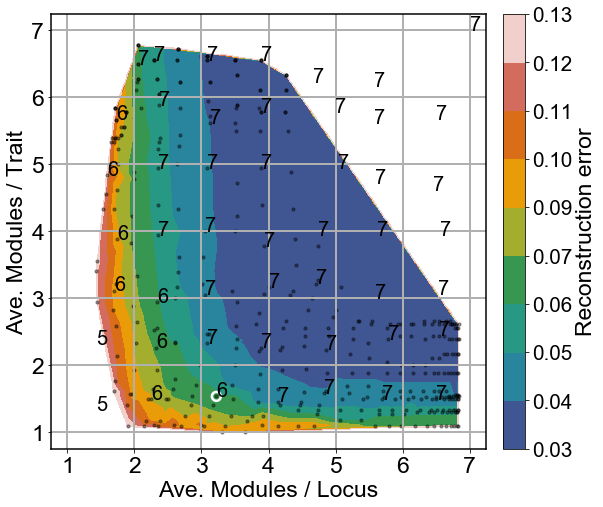

In [23]:
K = 7
ve = .25
minx = 1-ve
maxx = K+ve
miny = 1-ve
maxy = K+ve
vmax = 0.13
vmin = 0.03

kpts = []
for i in np.linspace(1.5,6.5,7):
    for j in np.linspace(1.5,6.5,7):
        kpts.append((i,j))

labeled_points = [(3.2, 1.6)]
plot_solution_space(fct, K, lamb1_range,lamb2_range, minx, maxx, miny, maxy, vmax, vmin,fs = 23,\
                    scatter=True, scatter_restricted=True, restrict_in_range = True, k_labeled_points = kpts , circled_points = labeled_points, save_name = fig_path + "sols_" + mode + ".pdf")

W: plot



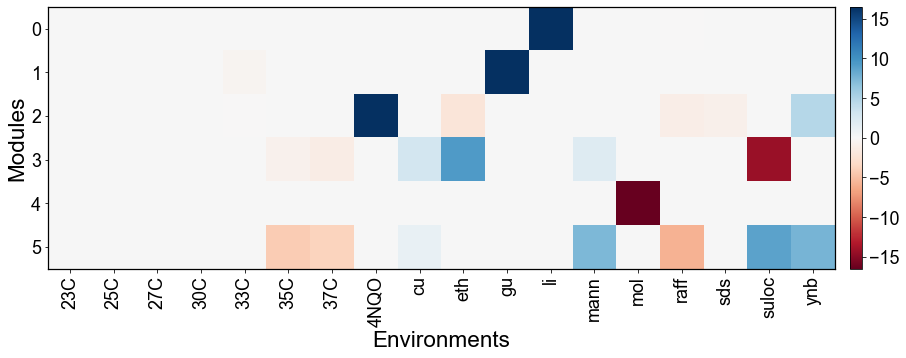

In [24]:
p = fct.find_key(3.1,1.8)
plot_Ws(fct, p, pp = 98, labelsize = 18,save_name = fig_path + "W_" + mode + ".pdf")
#filtl =  np.max(np.abs(F),axis=0) > 0.005
#plot_Ms(fct, p, pp = 100, restricted = filtl, two_line= True, labelsize = 24, max_cols = 120, save_name = fig_path + "M_" + mode + ".pdf")
#display_modularity(fct, p, save_name =  fig_path + "modhist_" + mode + ".pdf")


## names of loci

In [25]:
M = fct.M_preds[p]
W = fct.W_preds[p]

In [26]:
results_dir = "../QTL/BBQ_results_6_14_lt1_0"
cc= "0.99"
lt1 ="0.0"
lt2 = "0.003"
width = "50"
std = "2"
new_dir = f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt2_{lt2}_width_{width}_std_{std}_orf_and_anno"


In [27]:
loci_to_possible_orfs_d = pickle.load(open(f"{new_dir}/loci_to_possible_orfs_d", "rb"))

In [28]:
df=pd.read_csv(f'{new_dir}/orf_info.csv')
df=df.set_index('0')

In [29]:
df

,Standard Gene Name,Long Gene Name,Brief Description,Description,Function Summary,GO_Function,GO_Process
0,,,,,,,
YAL053W,FLC2,FLavin Carrier,Putative calcium channel involved in calcium r...,Putative calcium channel involved in calcium r...,FAD transmembrane transporter involved in hypo...,transmembrane transporter activity (5),response to chemical (12) ion transport (6) tr...
YAL054C,ACS1,Acetyl CoA Synthetase,Acetyl-coA synthetase isoform,Acetyl-coA synthetase isoform; along with Acs2...,Cytosolic acetyl-CoA ligase with roles in acet...,ligase activity (1),peptidyl-amino acid modification (4) monocarbo...
YAL055W,PEX22,PEroXisome related,Putative peroxisomal membrane protein,Putative peroxisomal membrane protein; require...,Protein that binds to Pex4p and activates its ...,enzyme regulator activity (3),protein targeting (7) transmembrane transport ...
YAL056W,GPB2,NaN,Multistep regulator of cAMP-PKA signaling,Multistep regulator of cAMP-PKA signaling; inh...,GAP-binding cAMP-dependent protein kinase inhi...,enzyme regulator activity (3),transcription by RNA polymerase II (15) respon...
YBL007C,SLA1,Synthetic Lethal with ABP1,Cytoskeletal protein binding protein,Cytoskeletal protein binding protein; required...,Endocytic adaptor protein that interacts with ...,ubiquitin-like protein binding (1) protein-mac...,endocytosis (7) regulation of organelle organi...
...,...,...,...,...,...,...,...
YBR111W-A_intron,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARS439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARS909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
loci_to_label_d = {}
for _ in loci_to_possible_orfs_d:
    to_add = []
    if len(loci_to_possible_orfs_d[_]) == 0:
        loci_to_label_d[_]= f"Unannotated loci near {_}"
    else:
        for orf in loci_to_possible_orfs_d[_]:
            gene_name = df.loc[orf, "Standard Gene Name"]
            if gene_name is np.NaN:
                to_add.append(orf)
            else:
                to_add.append(gene_name)
        loci_to_label_d[_]=" or ".join(to_add)

In [31]:
for _ in fct.loci_names:
    if _ not in loci_to_label_d.keys():
        loci_to_label_d[_]=f"never localized {_}"

In [32]:
loci_to_func_d ={}
for key in loci_to_possible_orfs_d:
    if len(loci_to_possible_orfs_d[key])== 1:
        loci_to_func_d[key]=df.loc[loci_to_possible_orfs_d[key][0], "GO_Function"]

In [33]:
loci_to_proc_d ={}
for key in loci_to_possible_orfs_d:
    if len(loci_to_possible_orfs_d[key])== 1:
        loci_to_proc_d[key]=df.loc[loci_to_possible_orfs_d[key][0], "GO_Process"]

In [34]:
thresh = .1

In [39]:
fct.loci_names.shape

(2179,)

In [40]:
len(loci_to_possible_orfs_d.keys())

108

In [35]:
Z = np.argsort(np.abs(M), axis = -1)[:,-25:]
to_write = []
for i in range(M.shape[0]):
    envs = " ".join([fct.env_names[_] for _ in list((np.where(np.abs(W[:,i])>0))[0])])
    print(f"\nModule {i} {envs}")
    to_write.append(f"Module {i} {envs}\n")
    pos = list(Z[i,...])[::-1]
    for j in pos:
        if np.abs(M[i,j])>thresh:
            po = loci_to_possible_orfs_d[fct.loci_names[j]]
            if len(po)>1 or len(po)==0:
                to_add = " or ".join(po)
                to_add = to_add + "\t\t\t\t\t\t\t"
            else:
                to_add = po[0] +"\t"+"\t".join([str(z) for z in df.loc[po[0]]])
            line = f"{M[i,j]:.2f}\t{j}\t{fct.loci_names[j]}\t{to_add}" 
            print(line)
            to_write.append(line + "\n")


Module 0 li raff


KeyError: 1342

In [23]:
F = open(f"{new_dir}/mod_anno.tsv", "w")
F.writelines(to_write)
F.close()

In [36]:
Z = np.argsort(np.abs(M), axis = -1)[:,-10:]
for i in range(M.shape[0]):
    print(f"\nModule {i}")
    pos = list(Z[i,...])[::-1]
    for j in pos:
        if fct.loci_names[j] in  loci_to_func_d:
            print(f"{M[i,j]:.2f}\t{fct.loci_names[j]}\t{loci_to_label_d[fct.loci_names[j]]}\t{loci_to_func_d[fct.loci_names[j]]}")
        else:
            print(f"{M[i,j]:.2f}\t{fct.loci_names[j]}\t{loci_to_label_d[fct.loci_names[j]]}")

        


Module 0
-0.80	1342	never localized 1342
-0.47	1298	never localized 1298
-0.19	1356	never localized 1356
-0.16	5707	never localized 5707
-0.15	1350	never localized 1350
-0.10	7296	never localized 7296
0.07	4333	never localized 4333
-0.06	1209	never localized 1209
-0.06	1121	never localized 1121
-0.05	1371	never localized 1371

Module 1
-0.44	5286	never localized 5286
0.42	5707	never localized 5707
-0.26	4333	never localized 4333
-0.23	5765	never localized 5765
-0.20	5284	never localized 5284
0.17	5667	never localized 5667
-0.16	5792	never localized 5792
-0.14	5304	never localized 5304
0.14	7788	never localized 7788
-0.13	5296	never localized 5296

Module 2
-0.45	5286	never localized 5286
-0.30	7087	never localized 7087
-0.28	7073	never localized 7073
-0.26	5031	never localized 5031
0.25	5210	never localized 5210
-0.22	7115	ENA5	transmembrane transporter activity (5)
-0.20	5707	never localized 5707
-0.19	5284	never localized 5284
0.18	4516	never localized 4516
0.17	7918	never localized

## Sankey

In [25]:
M = fct.M_preds[p]
W = fct.W_preds[p]

In [26]:
thresh = .15
MM = np.abs(M)
WW = np.abs(W)
dont_flip = np.where(np.sum(W, axis = 0)>0)[0]
print(dont_flip)
keep = MM.max(axis = 0)>thresh
M = M[:, keep]
MM = MM[:, keep]
print(MM.shape)

[0 2 5 7]
(8, 36)


In [27]:
names = []
for _ in range(keep.shape[0]):
    if keep[_]:
        names.append(loci_to_label_d[fct.loci_names[_]])
    

In [28]:
res = []
for i in range(M.shape[0]):
    total = 0
    displayed = 0
    for j in range(M.shape[1]):
        if np.abs(M[i,j])>thresh: 
            displayed += np.abs(M[i,j])
        total += np.abs(M[i,j])
    res.append(total - displayed)

In [29]:
print(res)

[0.8032284406580052, 0.868010711021475, 0.9265538983537303, 0.8662062797578196, 0.9026023759354125, 0.954407457868188, 0.1443579831690891, 0.4995116411565237]


In [30]:
import plotly.express as px

In [31]:
label = [f"Mod. {i}" for i in range(MM.shape[0])] + names + fct.env_names  +["all other effects"]
source = []
target = []
value = []
color = []
if False:
    for i in range(MM.shape[0]):
        target.append(i)
        source.append(len(label)-1)
        value.append(res[i])
        color.append('white')

    
for i in range(MM.shape[0]):
    for j in range(MM.shape[1]):
        if MM[i,j]<thresh: continue
        target.append(i)
        source.append(j+MM.shape[0])
        value.append(MM[i,j])
        #if M[i,j]<0:
        #print(label[j+MM.shape[0]], label[i], i in dont_flip, M[i,j]<0,(2*(i in dont_flip)-1) * M[i,j]<0 )
        #print(MM[i,j],M[i,j],(2*(i in dont_flip)-1) * M[i,j] )
        if (2*(i in dont_flip)-1) * M[i,j]<0:
            color.append(px.colors.qualitative.Set1[i])
        else: 
            color.append(px.colors.qualitative.Pastel1[i])

    
    
for i in range(WW.shape[1]):
    for j in range(WW.shape[0]):
        source.append(i)
        target.append(j+MM.shape[0]+MM.shape[1])
        value.append(WW[j,i]/50)
        #if W[j,i]<0:
        if (2*(i in dont_flip)-1) * W[j,i]<0:
            color.append('rgb(70,70,70)')
        else: 
            color.append(px.colors.qualitative.Pastel2[-1])

In [36]:
import plotly.graph_objects as go
import plotly.io as pio
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = "black"

    ),
    link = dict(
      source = source,
      target = target,
      value = value,
      color = color
  ))])

fig.update_layout(title_text="Module map", font_size=16,  width=700, height=1200)
fig.show()
pio.write_image(fig, "sankey.svg")

In [33]:
M = fct.M_preds[p]
W = fct.W_preds[p]

In [34]:
color

['rgb(228,26,28)',
 'rgb(228,26,28)',
 'rgb(228,26,28)',
 'rgb(251,180,174)',
 'rgb(251,180,174)',
 'rgb(228,26,28)',
 'rgb(55,126,184)',
 'rgb(55,126,184)',
 'rgb(77,175,74)',
 'rgb(77,175,74)',
 'rgb(77,175,74)',
 'rgb(77,175,74)',
 'rgb(77,175,74)',
 'rgb(222,203,228)',
 'rgb(152,78,163)',
 'rgb(152,78,163)',
 'rgb(222,203,228)',
 'rgb(152,78,163)',
 'rgb(152,78,163)',
 'rgb(152,78,163)',
 'rgb(152,78,163)',
 'rgb(152,78,163)',
 'rgb(255,127,0)',
 'rgb(254,217,166)',
 'rgb(254,217,166)',
 'rgb(254,217,166)',
 'rgb(254,217,166)',
 'rgb(254,217,166)',
 'rgb(254,217,166)',
 'rgb(255,255,51)',
 'rgb(255,255,204)',
 'rgb(255,255,51)',
 'rgb(255,255,51)',
 'rgb(255,255,51)',
 'rgb(255,255,51)',
 'rgb(255,255,51)',
 'rgb(255,255,204)',
 'rgb(166,86,40)',
 'rgb(229,216,189)',
 'rgb(166,86,40)',
 'rgb(166,86,40)',
 'rgb(253,218,236)',
 'rgb(247,129,191)',
 'rgb(253,218,236)',
 'rgb(247,129,191)',
 'rgb(247,129,191)',
 'rgb(247,129,191)',
 'rgb(204,204,204)',
 'rgb(204,204,204)',
 'rgb(204,20

(array([  1.,   1.,   0.,   2.,   0.,   0.,   5.,  20., 275.,  69.]),
 array([-0.52028773, -0.46065946, -0.4010312 , -0.34140293, -0.28177467,
        -0.22214641, -0.16251814, -0.10288988, -0.04326161,  0.01636665,
         0.07599492]),
 <a list of 10 Patch objects>)

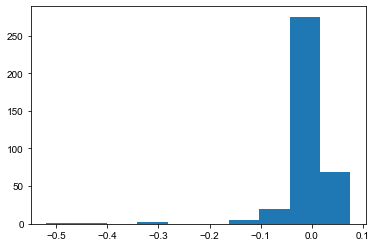

In [35]:
keep = np.abs(M[2,:])>.0001
plt.hist(M[2,keep])